# One-class SVM



# Outline:

## 1 Theory 

* One-class learning paradigm
* Brief recap about Support Vector Machines
* One-class SVM

## 2 Application

* Packages need
* Generating data
* Apply one-class SVM and play with parameters

## 3 Final remarks

## 1 Theory
### 1.1 One-class learning paradigm

In data science, one of the most important task is build a binary classifier of type $A$ vs $\overline{A} $, in which, when new data sample is given to the classifier, it’s able to predict whether the sample belongs to class $A$ or is an outlier (i.e. belongs to $\overline{A} $). In this scenario we can realy on two types of paradigms: 
* "Classic" supervised learning paradigm
*  One-class learning paradigm

In the fist one we train the model with both positive ($A$) and neagtive examples ($\overline{A}$). In the second one we train the model only on examples coming from the positive class and we take judgments from it on the universe ($ A \cup \overline{A} $). One-class learning paradigm si very usefull when we have a highly unbalanced dataset in which there are lot of data belonging to $A$ and only a few coming from $\overline{A}$. In particular we have to adopt this paradigm when the examples aviable of $\overline{A}$ are not a representative sample of all possbile instances coming from that class.

The basic idea of one-class learning paradigm is the following: given a training data, an algorithm creates a model identifying most probable region of the input space where data of that class lays. If newly encountered data is too different, according to some measurement, from that region, it is labeled as out-of-class.

One-class Support Vector Machine is one of the tool of one-class learning paradigm. This method is based on the same idea and based on same technical trick of the traditional two class SVM. For this reason in this presentation I decide to dedicate a section to the SVM for binary calssification and then, using the same reasoning and the same notation, explain how one-class SVM works.

## 1.2 Brief recap about Support Vector Machine
##### Linear Separable case
Consider a dataset  $\space \Omega = \{(x_1,y_1),\space ... \space, (x_n,y_n)\}$, where $ x_i\in\mathbb{R}^m $ is the $ i-th $ data input and $ y_i \in\{-1,+1\} $ is the $ i-th $ output pattern, indicating the class membership ($ A=1,\space \overline{A}=-1 $). 
For a first moment let assume that the data belonging to the two class are linearly separable. The aim SVM is find the hyperplane $ H: w^T x + b =0\space, w \in\mathbb{R}^n, \space b \in\mathbb{R} $ able to separate the classes, that maximize the margin between the hyperplane and the classes.
We can write the distance between a point $x$ and the hyperplan as $r:(w^Tx+b)\,/ \left\|  w  \right \| $. The points of $+1$ group have postive distance, the points of $-1$ group have negative distance. Notice that for the optimal hyperplane, the absolute distance from any nearest positive example is the same as the absolute distance from any nearest negative example. Due to the fact that example are linearly separabel we can write: $$ \frac{y_i(w^Tx_i+b)}{\left\|  w  \right \|} \ge \hat r \space\space\space \forall i=1,\,...\,,n$$ where $ \hat r $ is the minimum absolute distance between a point and the hyperplane. Thus, the problem to find the optimal hyperplane can be reduced to the minimization of $ \left\|  w  \right \|$. In particular the problem to solve is: $$\min_{w,b} \frac{1}{2}\left \| w \right \|^2 \\s.t. \space y_i(w^Tx_i+b)-1 \ge 0 \tag{1}$$
It is quadratic problem with linear constrain. In this scenario we have the strong duality theorem that guarantees us that the primal and the dual shares the same optimal value. 

##### Dual
Given a probelm $$ \min_{x} \,f(x)\\ s.t.\space\space\space g(x) \le 0$$ its dual form are the following: $$ \max_{\alpha}\, \inf_{x}\,(L(x,\alpha)) \\ s.t. \space\space\space \alpha \ge 0$$
where $L(x,\alpha)$ is the Lagrangian function given as $L(x,\alpha)=f(x)+\alpha g(x)$.
In our scenario the Lagrangian function is a convex quadratic function for any fix value $\alpha>0$. Thus it is bounded from below if and only if its minimum is achived. For this reason in our case ve can write the dual problem in this form: $$\max_{\alpha} L(x,\alpha) \\ s.t. \space\space\space \Delta_xL(x,\alpha)=0\\ \alpha \ge 0$$


In SVM scenario, using the formulas above (taking into account that $w$ and $b$ take the place of $x$), and doing the math we can write the dual of (1) as: $$ \min_{\alpha} \frac{1}{2}\sum_{i,j=1}^{n} y_i y_j \alpha_i \alpha_j x_i x_j- \sum_{i=1}^{n} \alpha_i \\
s.t.\space\space\space \alpha_i\ge 0 \space\space \forall i=1,\,...\,,n\\\sum_{i=1}^{n}\alpha_iy_i=0$$
Solving the dual problem we find $\alpha_i^*\space$. From them we can obtain the optimal value $w^*$ and $b^*$. The train data points $x_i$ for which $\alpha_i^* > 0$ holds are the support vectors.

##### Slack variables
The way in which we determine the hyperplane below imposes that in the train data there are zero miss-classify points. It is a wise choise remove this strong bound and allow to some traning data points the possibility to be miss classified. For this purpose we introduce into the problem the slack variables $\xi_i$ (one for each train data). A $\xi_i$ variable is equal to 0 if the $i-th$ point $x_i$ is correctly classify.
The problem now becomes: $$\min_{w,b,\xi} \frac{1}{2}\left \| w \right \|^2 + C \sum_{i=1}^{n}\xi_i \\s.t. \space y_i(w^Tx_i+b)-1 \ge -\xi_i \space\space \forall i=1,\,...\,,n\\\xi_i\ge0 \space\space\space \forall i=1,\,...\,,n$$
where $C$ is a positive costant that can be seen as the penalization for missclassification. If $C$ tends to infinitive the problem returns to be the one described above. The dual problem with the slack variabile is the following:
$$ \min_{\alpha} \frac{1}{2}\sum_{i,j=1}^{n} y_i y_j \alpha_i \alpha_j x_i x_j- \sum_{i=1}^{n} \alpha_i \\
s.t.\space\space\space 0 \le \alpha_i\le C  \space\space \forall i=1,\,...\,,n\\\sum_{i=1}^{n}\alpha_iy_i=0$$

#### Kernel trick
When the examples are not linearly separable the following two steps strategy is used:
* the $x_i$ are projected into a larger space called feature space with a non linear function $\phi(\,\cdot\,)$
* the optimal hyperplane in the feature space is computed

This method is baed on Cover’s theorem on separability, which states that non-linearly separable patterns may be transformed into a new feature space where the patterns are linearly separable with high probability, provided that the transformation is nonlinear and the dimensionality of the feature space is high enough.


Luckily, due to the fact that the hyperplane in the feature space could be defined as $\sum_{i=1}^{n}y_i\alpha_i\phi(x_i)\cdot\phi(x)=0$, if we use a kernel function $K$ (i.e. a function $K(x,y)=\phi(x)\cdot\phi(y)$) we could compute the dot product into the feature space without explicitly representing the train data into that space. This is known as the kernel trick and it is what gives SVM such a great power with non-linear separable data points. The feature space can be of unlimited dimension and thus the hyperplane separating the data can be very complex. Popular choices for the kernel function are polynomial kernel and radial-basis function kernel (more detail about different types of kernel will be seen in section 2.3).
With the kernel trick the dual problem to solve is:
$$ \min_{\alpha} \frac{1}{2}\sum_{i,j=1}^{n} y_i y_j \alpha_i \alpha_j K(x_i ,x_j)- \sum_{i=1}^{n} \alpha_i \\
s.t.\space\space\space 0 \le \alpha_i\le C  \space\space \forall i=1,\,...\,,n\\\sum_{i=1}^{n}\alpha_iy_i=0$$
Solving it we find $\alpha_i^*\space$ and we obtain the decision function $$f(x)=\sum_{i=1}^{n} y_i\alpha_i^* K(x_i,x)$$
A positive value of $f(x)$ indicates that $x$ is classified as positive ($A$). A negative value of $f(x)$ indicates that $x$ is classified as negative ($\overline{A}$).

## 1.3 One-class SVM
As introduce in the section 1.1 in one-learning paradigm the model's examples coming only from the postive class ($A$). So the main difference between the one-class SVM and the original SVM is that in one-class SVM the only given information is the positive samples. Whereas in the original SVM information is given on both postive samples and negative samples.
To distinguish between postive and negative class (given only one class) the idea si finding the boundary region that comprises most of the training samples. If a new test sample falls within this boundary it is classified as of positive, otherwise it is recognised as an outlier (negative class). 

Suppose that the input data are $\space \Omega = \{(x_1,y_1),\space ... \space, (x_n,y_n)\}$, where $ x_i\in\mathbb{R}^m \space$and $ y_i =+1\space \forall i=1,\,...\,n $ (i.e. all data input belogns to positive class).
$\phi$ is a non-linear transformation. The training stage consists in:
* projecting the training samples to a higher dimensional feature space 
* separating most of the samples from the origin by a maximum-margin hyperplane which is as far away from the origin as possible. 

<img src="images/one_svm.gif", style="width:600px;height:300px;">


In order to determine the maximum-margin hyperplane we have to determine the parameter $w$ and $b$ by solving the following optimization problem: $$\min_{w,b,\xi} \frac{1}{2}\left \| w \right \|^2 + \frac{1}{vn}\sum_{i=1}^{n}\xi_i -p\\s.t.\space\space\space \langle w,\phi(x_i)\rangle \ge p-\xi_i \space\space\space\space \forall i=1,\,...\,n\\ \xi_i \ge 0\space\space\space\space \forall i=1,\,...\,,n$$
The parameter $v \in (0,1]$  is a special parameter for one-class SVM. It is the upper-bound of the ratio of training samples that fall into the outlier region, as well as the lower-bound of the ratio of support vectors among all the samples. Notice that, as happens with the $C\space$ parameter for classic SVM, if $\frac{1}{vn}\space$ tends to infinity (i.e. $v$ tends to 0) the penalty for don't respect the linear costrain is infinitive so no train example could be in the outlier region. 

The minimization problem above is solved by its Lagrange dual problem: 
$$\min_{\alpha} \sum_{i,\,j=1}^{n} \alpha_i\alpha_j K(x_i,x_j) \\s.t.\space\space\space 0 \le \alpha_i \le \frac{1}{vn} \space\space\space\space \forall i=1,\,...\,,n\\ \sum_{i=1}^{n}\alpha_i=1 $$

Solving the dual problem we find $\alpha_i^*\space$, and we can reconstructing $p^*$ from the primal problem. We obtain the decision function $$f(x)=\sum_{i=1}^{n} \alpha_i^* K(x_i,x)-p^*$$
A negative value of $f(x)$ indicates that $x$ is an outlier. The train data points $x_i$ for which $0 < \alpha_i^* <\frac{1}{vn}$ holds are the support vectors; these points lie directly on the separating hyperplane in the feature space.

## 2 Application
### 2.1 Packages need

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
%matplotlib inline

### 2.2 Generating data

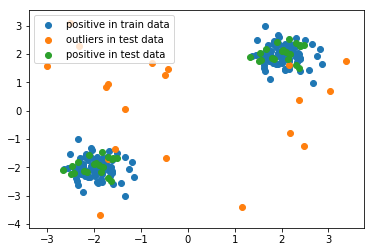

In [43]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
np.random.seed(17)
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

plt.scatter([a[0] for a in X_train],[a[1] for a in X_train])
plt.scatter([a[0] for a in X_outliers],[a[1] for a in X_outliers])
plt.scatter([a[0] for a in X_test],[a[1] for a in X_test])
plt.legend(["positive in train data", "outliers in test data", "positive in test data"], loc="upper left")

### 2.3 Fit one-class SVM and play with parameters

The one-class SVM can be apply in Python using the function [OneClassSVM](http://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html#sklearn.svm.OneClassSVM) of the sklearn library. As we can see from the API there is a lot of parameters to play with. We start analizing the default one an then we try to play with these parameters. In particular we are interested in:
* nu, i.e. the $v$ parameter
* kernel, i.e. type of kernel applyed
* gamma, i.e. parameter of the kernel
* degree, i.e. parameter of the polinomial kernel

In [44]:
clf = svm.OneClassSVM()
clf.fit(X_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.5, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

As the output say the $v$ parameter is 0.5, so at most half of train example could be in the outlier region. 

The kernel applyed is radial-basis function kernel. The matematical formula of this kernel is: $$K(x,y)=exp\left(-\frac{\left \| x-y \right \|^2}{2\sigma^2}\right)$$
where $\sigma \in\mathbb{R}$ is a kernel parameter. With this type of kernel the dimension of the feature space could be unbounded. More $\sigma$ is small more complex will be the feature space in which we are going to project the input data.

In our case $\sigma$ is equal to 2 (Beacuse by default gamma is equal to $1/m\space$ (where $m$ is the dimension of the input data). And gamma is the inverse of $\sigma$).

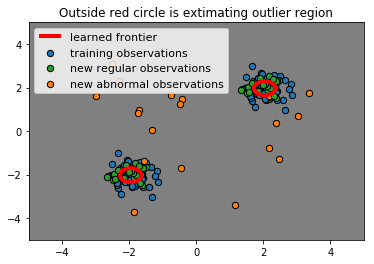

Percentage of correctly classify positive class in train set: 0.5
Percentage of correctly classify positive class in test set: 0.35
Percentage of correctly classify outliers: 1.0
Accuracy in the entrie test set: 0.5666666666666667


In [45]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Outside red circle is extimating outlier region")
plt.contourf(xx, yy, Z, levels=[Z.min(), 0], colors="gray")
a = plt.contour(xx, yy, Z, levels=[0], linewidths=4, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], s=s, edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], s=s,
                edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], s=s,
                 edgecolors='k')
plt.legend([b1,c,b2],["positive in train data", "outliers in test data", "positive in test data"], loc="upper left")
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.show()

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size
print("Percentage of correctly classify positive class in train set: "+str(1-n_error_train/len(X_train)))
print("Percentage of correctly classify positive class in test set: "+str(1-n_error_test/len(X_test)))
print("Percentage of correctly classify outliers: "+str(1-n_error_outliers/len(X_outliers)))
print("Accuracy in the entrie test set: "+ str(1-(n_error_test+n_error_outliers)/(len(X_test)+len(X_outliers))))

As we can see form the plot and also from the accuracy, the region of postive example is too conservative. It is caused by the fact that we build the frontier in such a way to allow half of training data be over that line.
Let's try to enlarge it by changing the $v$ parameter (keeping all the other paraemters fix).

In [46]:
clf = svm.OneClassSVM(nu=0.1)
clf.fit(X_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

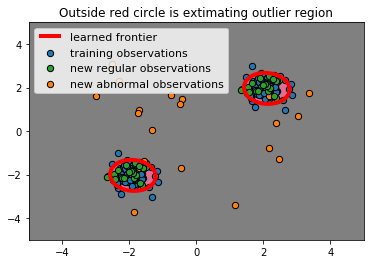

Percentage of correctly classify positive class in train set: 0.89
Percentage of correctly classify positive class in test set: 0.95
Percentage of correctly classify outliers: 0.9
Accuracy in the entrie test set: 0.9333333333333333


In [47]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Outside red circle is extimating outlier region")
plt.contourf(xx, yy, Z, levels=[Z.min(), 0], colors="gray")
a = plt.contour(xx, yy, Z, levels=[0], linewidths=4, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], s=s, edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], s=s,
                edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], s=s,
                 edgecolors='k')
plt.legend([b1,c,b2],["positive in train data", "outliers in test data", "positive in test data"], loc="upper left")
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.show()

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size
print("Percentage of correctly classify positive class in train set: "+str(1-n_error_train/len(X_train)))
print("Percentage of correctly classify positive class in test set: "+str(1-n_error_test/len(X_test)))
print("Percentage of correctly classify outliers: "+str(1-n_error_outliers/len(X_outliers)))
print("Accuracy in the entrie test set: "+ str(1-(n_error_test+n_error_outliers)/(len(X_test)+len(X_outliers))))

As expected the diameter of the cricle increases. The overall accuracy in the test set increases. However if avoid false postive is extrimly important (for example in a clinical scenario) we should prefer the first model.

Let's try to change the $\sigma$ parameter of the kerenl function:
First we try to reduce sigma.

In [48]:
clf = svm.OneClassSVM(nu=0.1,gamma=10)
clf.fit(X_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=10, kernel='rbf',
      max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

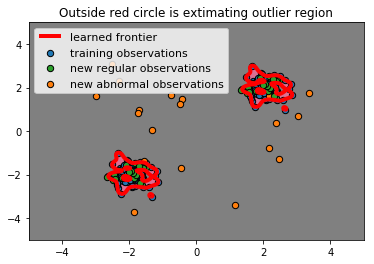

Percentage of correctly classify positive class in train set: 0.87
Percentage of correctly classify positive class in test set: 0.8
Percentage of correctly classify outliers: 0.9
Accuracy in the entrie test set: 0.8333333333333334


In [49]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Outside red circle is extimating outlier region")
plt.contourf(xx, yy, Z, levels=[Z.min(), 0], colors="gray")
a = plt.contour(xx, yy, Z, levels=[0], linewidths=4, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], s=s, edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], s=s,
                edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], s=s,
                 edgecolors='k')
plt.legend([b1,c,b2],["positive in train data", "outliers in test data", "positive in test data"], loc="upper left")
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.show()

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size
print("Percentage of correctly classify positive class in train set: "+str(1-n_error_train/len(X_train)))
print("Percentage of correctly classify positive class in test set: "+str(1-n_error_test/len(X_test)))
print("Percentage of correctly classify outliers: "+str(1-n_error_outliers/len(X_outliers)))
print("Accuracy in the entrie test set: "+ str(1-(n_error_test+n_error_outliers)/(len(X_test)+len(X_outliers))))

Clearly reducing to much $\sigma$ produce an overfitting on the train set. Infact the feature space is too complicated for our data.

Let's try to increase it:

In [50]:
clf = svm.OneClassSVM(nu=0.1,gamma=0.0001)
clf.fit(X_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.0001, kernel='rbf',
      max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

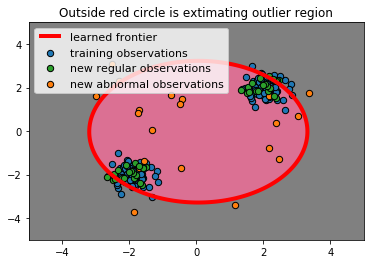

Percentage of correctly classify positive class in train set: 0.925
Percentage of correctly classify positive class in test set: 0.8
Percentage of correctly classify outliers: 0.30000000000000004
Accuracy in the entrie test set: 0.6333333333333333


In [51]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Outside red circle is extimating outlier region")
plt.contourf(xx, yy, Z, levels=[Z.min(), 0], colors="gray")
a = plt.contour(xx, yy, Z, levels=[0], linewidths=4, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], s=s, edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], s=s,
                edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], s=s,
                 edgecolors='k')
plt.legend([b1,c,b2],["positive in train data", "outliers in test data", "positive in test data"], loc="upper left")
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.show()

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size
print("Percentage of correctly classify positive class in train set: "+str(1-n_error_train/len(X_train)))
print("Percentage of correctly classify positive class in test set: "+str(1-n_error_test/len(X_test)))
print("Percentage of correctly classify outliers: "+str(1-n_error_outliers/len(X_outliers)))
print("Accuracy in the entrie test set: "+ str(1-(n_error_test+n_error_outliers)/(len(X_test)+len(X_outliers))))

In this scenario the feature space is not enought complicated to capture the variety of data.

Let's try to change the kernel functon:
the other big family of kernel function used in the litterature is polinomial kernel: $$K(x,y)=\left(\gamma x\cdot y+1\right)^p$$

With this kernel the feature space has a bounded dimension.

In the next cells we apply the polynomial kernel whit degree $p=2,4,20$. At the end there is the consideration.


In [52]:
clf = svm.OneClassSVM(kernel="poly", degree=2,nu=0.1)
clf.fit(X_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=2, gamma='auto', kernel='poly',
      max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

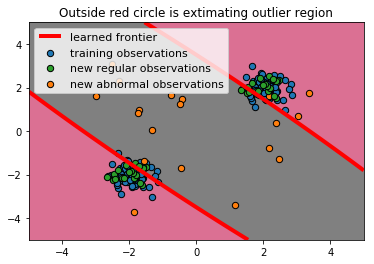

Percentage of correctly classify positive class in train set: 0.895
Percentage of correctly classify positive class in test set: 0.8
Percentage of correctly classify outliers: 0.8
Accuracy in the entrie test set: 0.8


In [53]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Outside red circle is extimating outlier region")
plt.contourf(xx, yy, Z, levels=[Z.min(), 0], colors="gray")
a = plt.contour(xx, yy, Z, levels=[0], linewidths=4, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], s=s, edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], s=s,
                edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], s=s,
                 edgecolors='k')
plt.legend([b1,c,b2],["positive in train data", "outliers in test data", "positive in test data"], loc="upper left")
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.show()

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size
print("Percentage of correctly classify positive class in train set: "+str(1-n_error_train/len(X_train)))
print("Percentage of correctly classify positive class in test set: "+str(1-n_error_test/len(X_test)))
print("Percentage of correctly classify outliers: "+str(1-n_error_outliers/len(X_outliers)))
print("Accuracy in the entrie test set: "+ str(1-(n_error_test+n_error_outliers)/(len(X_test)+len(X_outliers))))

In [54]:
clf = svm.OneClassSVM(kernel="poly", degree=4, nu=0.1)
clf.fit(X_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=4, gamma='auto', kernel='poly',
      max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

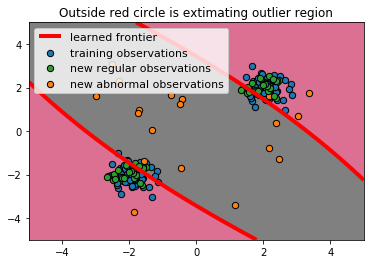

Percentage of correctly classify positive class in train set: 0.895
Percentage of correctly classify positive class in test set: 0.8
Percentage of correctly classify outliers: 0.8
Accuracy in the entrie test set: 0.8


In [55]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Outside red circle is extimating outlier region")
plt.contourf(xx, yy, Z, levels=[Z.min(), 0], colors="gray")
a = plt.contour(xx, yy, Z, levels=[0], linewidths=4, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], s=s, edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], s=s,
                edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], s=s,
                 edgecolors='k')
plt.legend([b1,c,b2],["positive in train data", "outliers in test data", "positive in test data"], loc="upper left")
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.show()

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size
print("Percentage of correctly classify positive class in train set: "+str(1-n_error_train/len(X_train)))
print("Percentage of correctly classify positive class in test set: "+str(1-n_error_test/len(X_test)))
print("Percentage of correctly classify outliers: "+str(1-n_error_outliers/len(X_outliers)))
print("Accuracy in the entrie test set: "+ str(1-(n_error_test+n_error_outliers)/(len(X_test)+len(X_outliers))))

In [56]:
clf = svm.OneClassSVM(kernel="poly", degree=20, nu=0.1)
clf.fit(X_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=20, gamma='auto', kernel='poly',
      max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

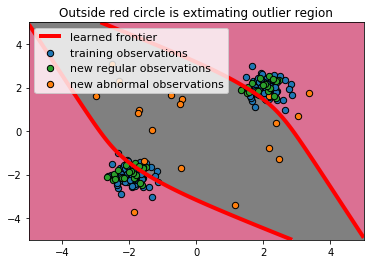

Percentage of correctly classify positive class in train set: 0.895
Percentage of correctly classify positive class in test set: 0.8
Percentage of correctly classify outliers: 0.8
Accuracy in the entrie test set: 0.8


In [57]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Outside red circle is extimating outlier region")
plt.contourf(xx, yy, Z, levels=[Z.min(), 0], colors="gray")
a = plt.contour(xx, yy, Z, levels=[0], linewidths=4, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], s=s, edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], s=s,
                edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], s=s,
                 edgecolors='k')
plt.legend([b1,c,b2],["positive in train data", "outliers in test data", "positive in test data"], loc="upper left")
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.show()

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size
print("Percentage of correctly classify positive class in train set: "+str(1-n_error_train/len(X_train)))
print("Percentage of correctly classify positive class in test set: "+str(1-n_error_test/len(X_test)))
print("Percentage of correctly classify outliers: "+str(1-n_error_outliers/len(X_outliers)))
print("Accuracy in the entrie test set: "+ str(1-(n_error_test+n_error_outliers)/(len(X_test)+len(X_outliers))))

As we can see this kernel is not appropriate with this type of data.  

## Final remarks

One-class SVM models the distribution of one class only, and therefore offers an inherently different approach to classification problems than standard algorithms. One-class SVM is a viable alternative to standard classification algorithms in the case of gross class imbalance, when only few cases are available from one class.
When we use this method we have to keep in mind that the hyperparameter $v$, type of kernel and the parameter of the kernel must be carefully choosen (via Cross Validation). Infact by the plots and the classification report we have noticed how the positive class region and the ouliers region changes when only one of these parameter changes. 